# Data Scientist Professional Practical Exam Submission

**Use this template to write up your summary for submission. Code in Python or R needs to be included.**


## 📝 Task List

Your written report should include both code, output and written text summaries of the following:
- Data Validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Model Development
  - Include your reasons for selecting the models you use as well as a statement of the problem type
  - Code to fit the baseline and comparison models
- Model Evaluation
  - Describe the performance of the two models based on an appropriate metric
- Business Metrics
  - Define a way to compare your model performance to the business
  - Describe how your models perform using this approach
- Final summary including recommendations that the business should undertake


## Company Background

Tasty Bytes was founded in 2020 in the midst of the Covid Pandemic. The world wanted
inspiration so we decided to provide it. We started life as a search engine for recipes, helping
people to find ways to use up the limited supplies they had at home.
Now, over two years on, we are a fully fledged business. For a monthly subscription we will put
together a full meal plan to ensure you and your family are getting a healthy, balanced diet
whatever your budget. Subscribe to our premium plan and we will also deliver the ingredients
to your door.

## Question

- Predict which recipes will lead to high traffic?
- Correctly predict high traffic recipes 80% of the time?


## Dataset
The data you will use for this analysis can be accessed here: `"recipe_site_traffic_2212.csv"`

| Column Name                     | Criteria                                                                                                                                                                        |
|---------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| recipe                    | Numeric, unique identifier of recipe                                                                                     |
| calories                            | Numeric, number of calories                                                                                                        |
| sugar                 | Numeric, amount of sugar in grams                                                                          |
| protein                     | Numeric, amount of protein in grams                                                                                                       |
| carbohydrate                 | Numeric, amount of carbohydrates in grams                                         |
| category                      | Character, type of recipe. Recipes are listed in one of ten possible groupings (Lunch/Snacks', 'Beverages', 'Potato','Vegetable', 'Meat', 'Chicken, 'Pork', 'Dessert', 'Breakfast', 'One Dish Meal').                                                                                                                         |
| servings                     | Numeric, number of servings for the recipe  |
| high_traffic          | Character, if the traffic to the site was high when this recipe was shown, this is marked with “High”.                                                                                                                      |
                                                                                   



## Data Validation

In [1]:
# Data Validation
# Check all variables in the data against the criteria in the dataset above

# Start coding here...
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import numpy as np
recipe_df = pd.read_csv('recipe_site_traffic_2212.csv')
recipe_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB


In [2]:
recipe_df.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN


## Validating unique values in the column 'category'

In [3]:
recipe_df.category.value_counts()

Breakfast         106
Chicken Breast     98
Beverages          92
Lunch/Snacks       89
Potato             88
Pork               84
Vegetable          83
Dessert            83
Meat               79
Chicken            74
One Dish Meal      71
Name: category, dtype: int64

#### According to the data validation table criteria, "Chicken Breast" should not be a separate category. Changing "chicken breast" to "chicken" and confirming the column "category" unique values

In [4]:
recipe_df.category.replace('Chicken Breast','Chicken',inplace=True)
category_values = recipe_df["category"].nunique()
print(f"The category column has {category_values} unique values")

The category column has 10 unique values


## Validating unique values in the column "servings"

In [5]:
recipe_df.servings.value_counts()

4               389
6               197
2               183
1               175
4 as a snack      2
6 as a snack      1
Name: servings, dtype: int64

### Converting the serving column to integer

In [6]:
recipe_df.servings.replace({'4 as a snack':4,'6 as a snack':6},inplace=True)
recipe_df['servings'] = recipe_df['servings'].astype('int')
recipe_df['servings'].dtype

dtype('int64')

## Validate target variable "high_traffic"

In [7]:
val_counts = recipe_df.high_traffic.value_counts()
recipe_df['high_traffic'] = recipe_df.high_traffic.fillna(0)
recipe_df['high_traffic'] = recipe_df.high_traffic.replace('High',1)
recipe_df['high_traffic'].value_counts()

1    574
0    373
Name: high_traffic, dtype: int64

#### Filled the NA values of the target variable with 0 and replaced 'High' with 1.

## Checking the duplicate values

In [8]:
duplicate_values = recipe_df.duplicated().sum()
print(f"There are {duplicate_values} duplicate values in the dataset")

There are 0 duplicate values in the dataset


## Dropping rows where all the columns "calories," "carbohydrate," "sugar," and "protein" have null values, as 4 out of 7 columns had NA values and those rows wouldn't have contributed to recipe prediction.

In [9]:
recipe_df = recipe_df[recipe_df['calories'].notna() | recipe_df['carbohydrate'].notna() | recipe_df['sugar'].notna() | recipe_df['protein'].notna()]
recipe_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 895 entries, 1 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        895 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      895 non-null    object 
 6   servings      895 non-null    int64  
 7   high_traffic  895 non-null    int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 62.9+ KB


## Insights

The dataset has 947 rows and 8 columns, with 0 duplicate values before cleaning and 52 missing values in the columns "calories," "carbohydrate," "sugar," and "protein," as well as 373 missing values in the target variable "high traffic." I have validated all the columns against the criteria in the dataset table:

- **recipe**: Same as description without missing values.
- **calories**: There are 52 missing values in the column. Rows with null values in all of the "calories," "carbohydrate," "sugar," and "protein" columns have been dropped. 
- **carbohydrate**: There are 52 missing values in the column. Rows with null values in all of the "calories," "carbohydrate," "sugar," and "protein" columns have been dropped. 
- **sugar**: There are 52 missing values in the column. Rows with null values in all of the "calories," "carbohydrate," "sugar," and "protein" columns have been dropped. 
- **protein**:There are 52 missing values in the column. Rows with null values in all of the "calories," "carbohydrate," "sugar," and "protein" columns have been dropped. 
- **category**: The category column had 11 unique values.Replaced category 'chicken breast' with 'chicken'. After cleaning the column has 10 unique values.
- **servings**: Changed the type to integer. The values "4 as a snack" and "6 as a snack" have been changed to the values "4" and "6, respectively.
- **high_traffic** :The column contains 373 missing values. The missing values are replaced with 0 and the column value 'High' is replaced with 1.

- **After the data validation and cleaning, the dataset contains 895 rows and 8 columns.**

## Exploratory Data Analysis

### Univariate Data Analysis


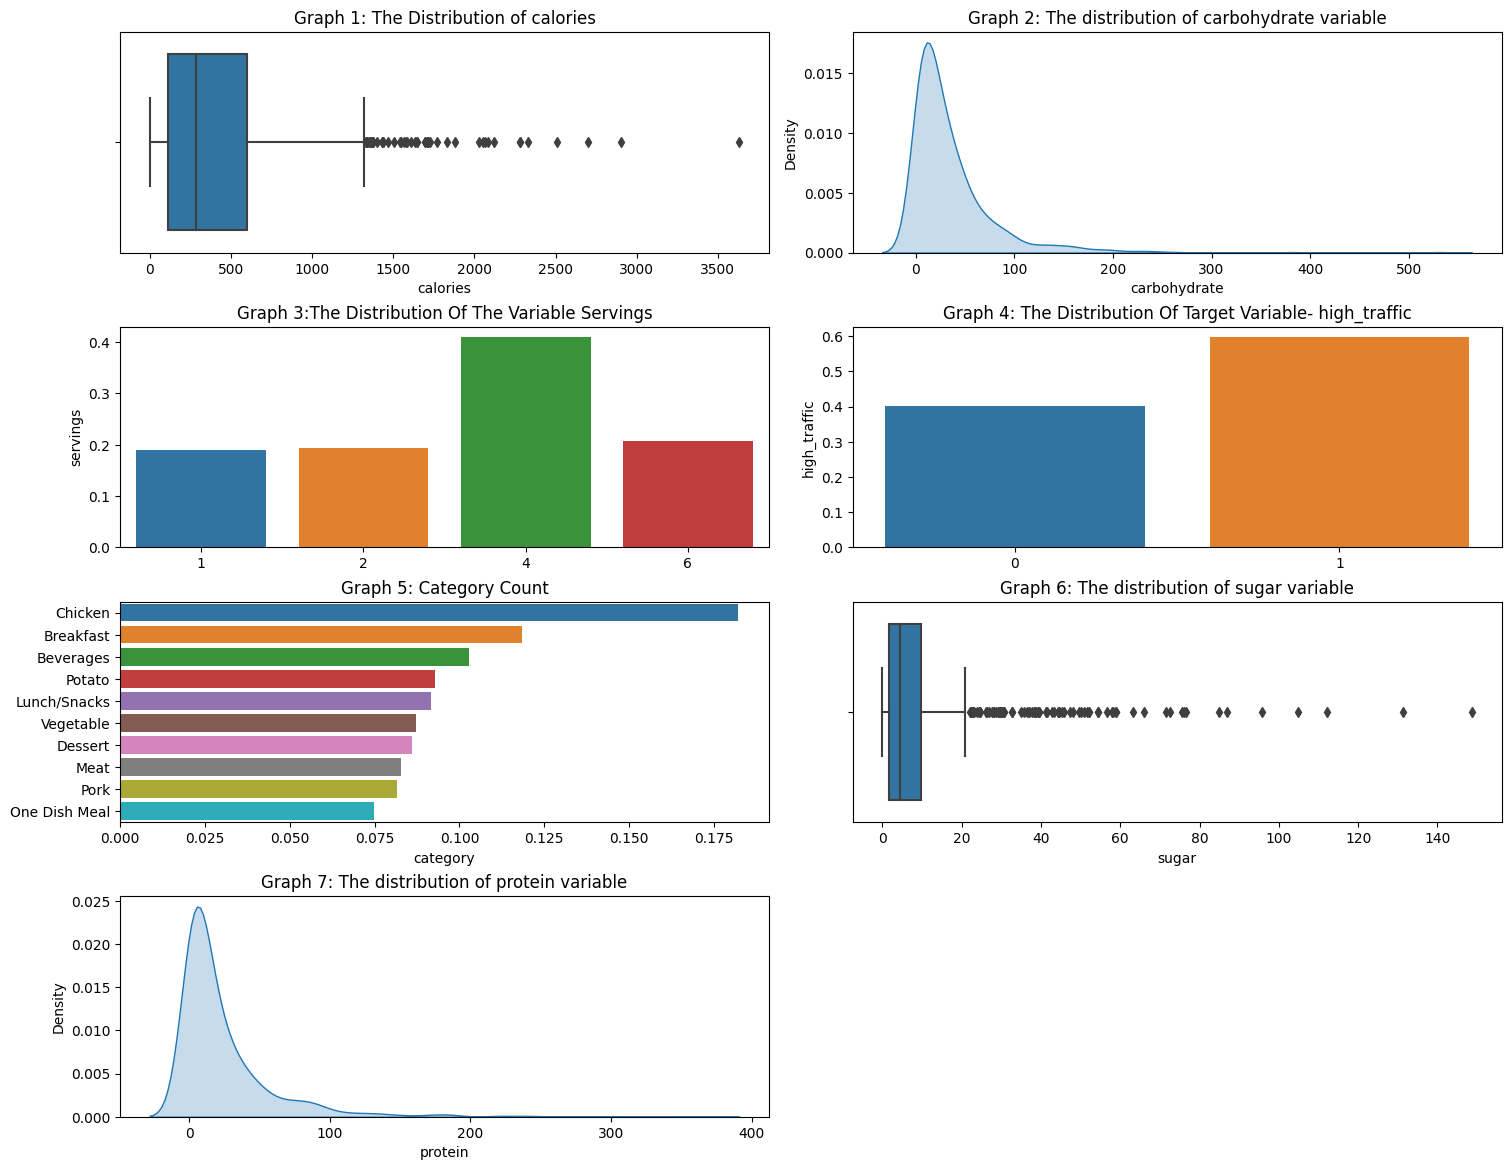

In [10]:
norm_count_category = recipe_df["category"].value_counts(normalize=True)
norm_count_servings = recipe_df["servings"].value_counts(normalize=True)
norm_count_high_traffic = recipe_df["high_traffic"].value_counts(normalize=True)

fig = plt.figure(figsize=(15, 16), constrained_layout=True)
spec = fig.add_gridspec(6, 2)
ax0 = fig.add_subplot(spec[0,0])

## Analyzing the distribution of the calories variable
sns.boxplot(x='calories',data=recipe_df,ax=ax0).set(title='Graph 1: The Distribution of calories')
ax1 = fig.add_subplot(spec[0,1])

## Analyzing the distribution of the variable "carbohydrate"
sns.kdeplot(x='carbohydrate',data=recipe_df,ax=ax1,shade=True).set(title = 'Graph 2: The distribution of carbohydrate variable')
ax2 = fig.add_subplot(spec[1,0])

## Analyzing the distribution of the variable "servings"
sns.barplot(x=norm_count_servings.index,y=norm_count_servings,data=recipe_df,ax=ax2).set(title='Graph 3:The Distribution Of The Variable Servings')
ax3 = fig.add_subplot(spec[1,1])

## Analyzing the distribution of the target variable "high_traffic"
sns.barplot(x=norm_count_high_traffic.index,y=norm_count_high_traffic, data=recipe_df,ax=ax3).set(title='Graph 4: The Distribution Of Target Variable- high_traffic')
ax4 = fig.add_subplot(spec[2,0])

## Analyzing the distribution of the variable "category" 
sns.barplot(x=norm_count_category,y=norm_count_category.index,data=recipe_df,ax=ax4).set(title='Graph 5: Category Count')
ax5 = fig.add_subplot(spec[2,1])

## Analyzing the distribution of the variable "sugar"
sns.boxplot(x='sugar',data=recipe_df,ax=ax5).set(title = 'Graph 6: The distribution of sugar variable')
ax6 = fig.add_subplot(spec[3,0])

## Analyzing the distribution of the variable "protein"
sns.kdeplot(x='protein',data=recipe_df,ax=ax6,shade=True).set(title = 'Graph 7: The distribution of protein variable')
plt.show()

#### Insights:

- **Graph 1**:  The variable "calories" has a minimum value of 0.14, a median value of 288, and a maximum value of 3633.
- **Graph 2**: The variable "Carbohydrate" has a right skewed distribution.
- **Graph 3**: 40% of the recipes have the variable "servings" as 4.
- **Graph 4**: 60% of the recipes are the high traffic recipes.
- **Graph 5**: "Chicken" is the recipe category with the most entries in the dataframe, followed by "Breakfast."
- **Graph 6**: The variable "sugar" has a minimum value of 0.01, a median value of 4.55, and a maximum value of 149.
- **Graph 7**: The distribution of the variable "protein" is right skewed.


### Bivariate Data Analysis


<AxesSubplot: >

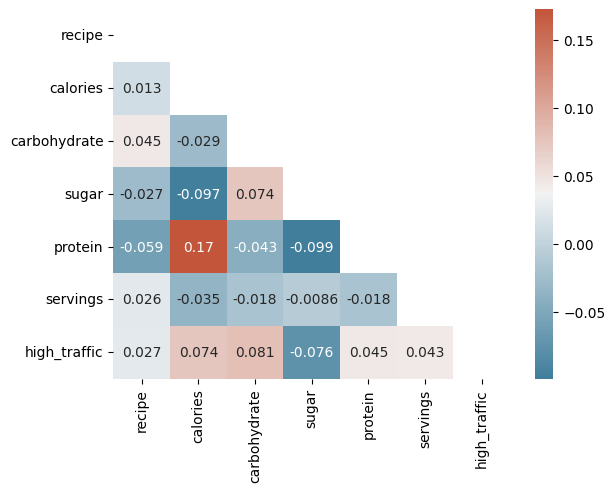

In [11]:
correlation = recipe_df.corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))
# Configure a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap
sns.heatmap(correlation, annot=True, mask = mask, cmap=cmap)

I don't see any significant correlation between any of the variables.

#### Bivariate Analysis- Graphical Representation

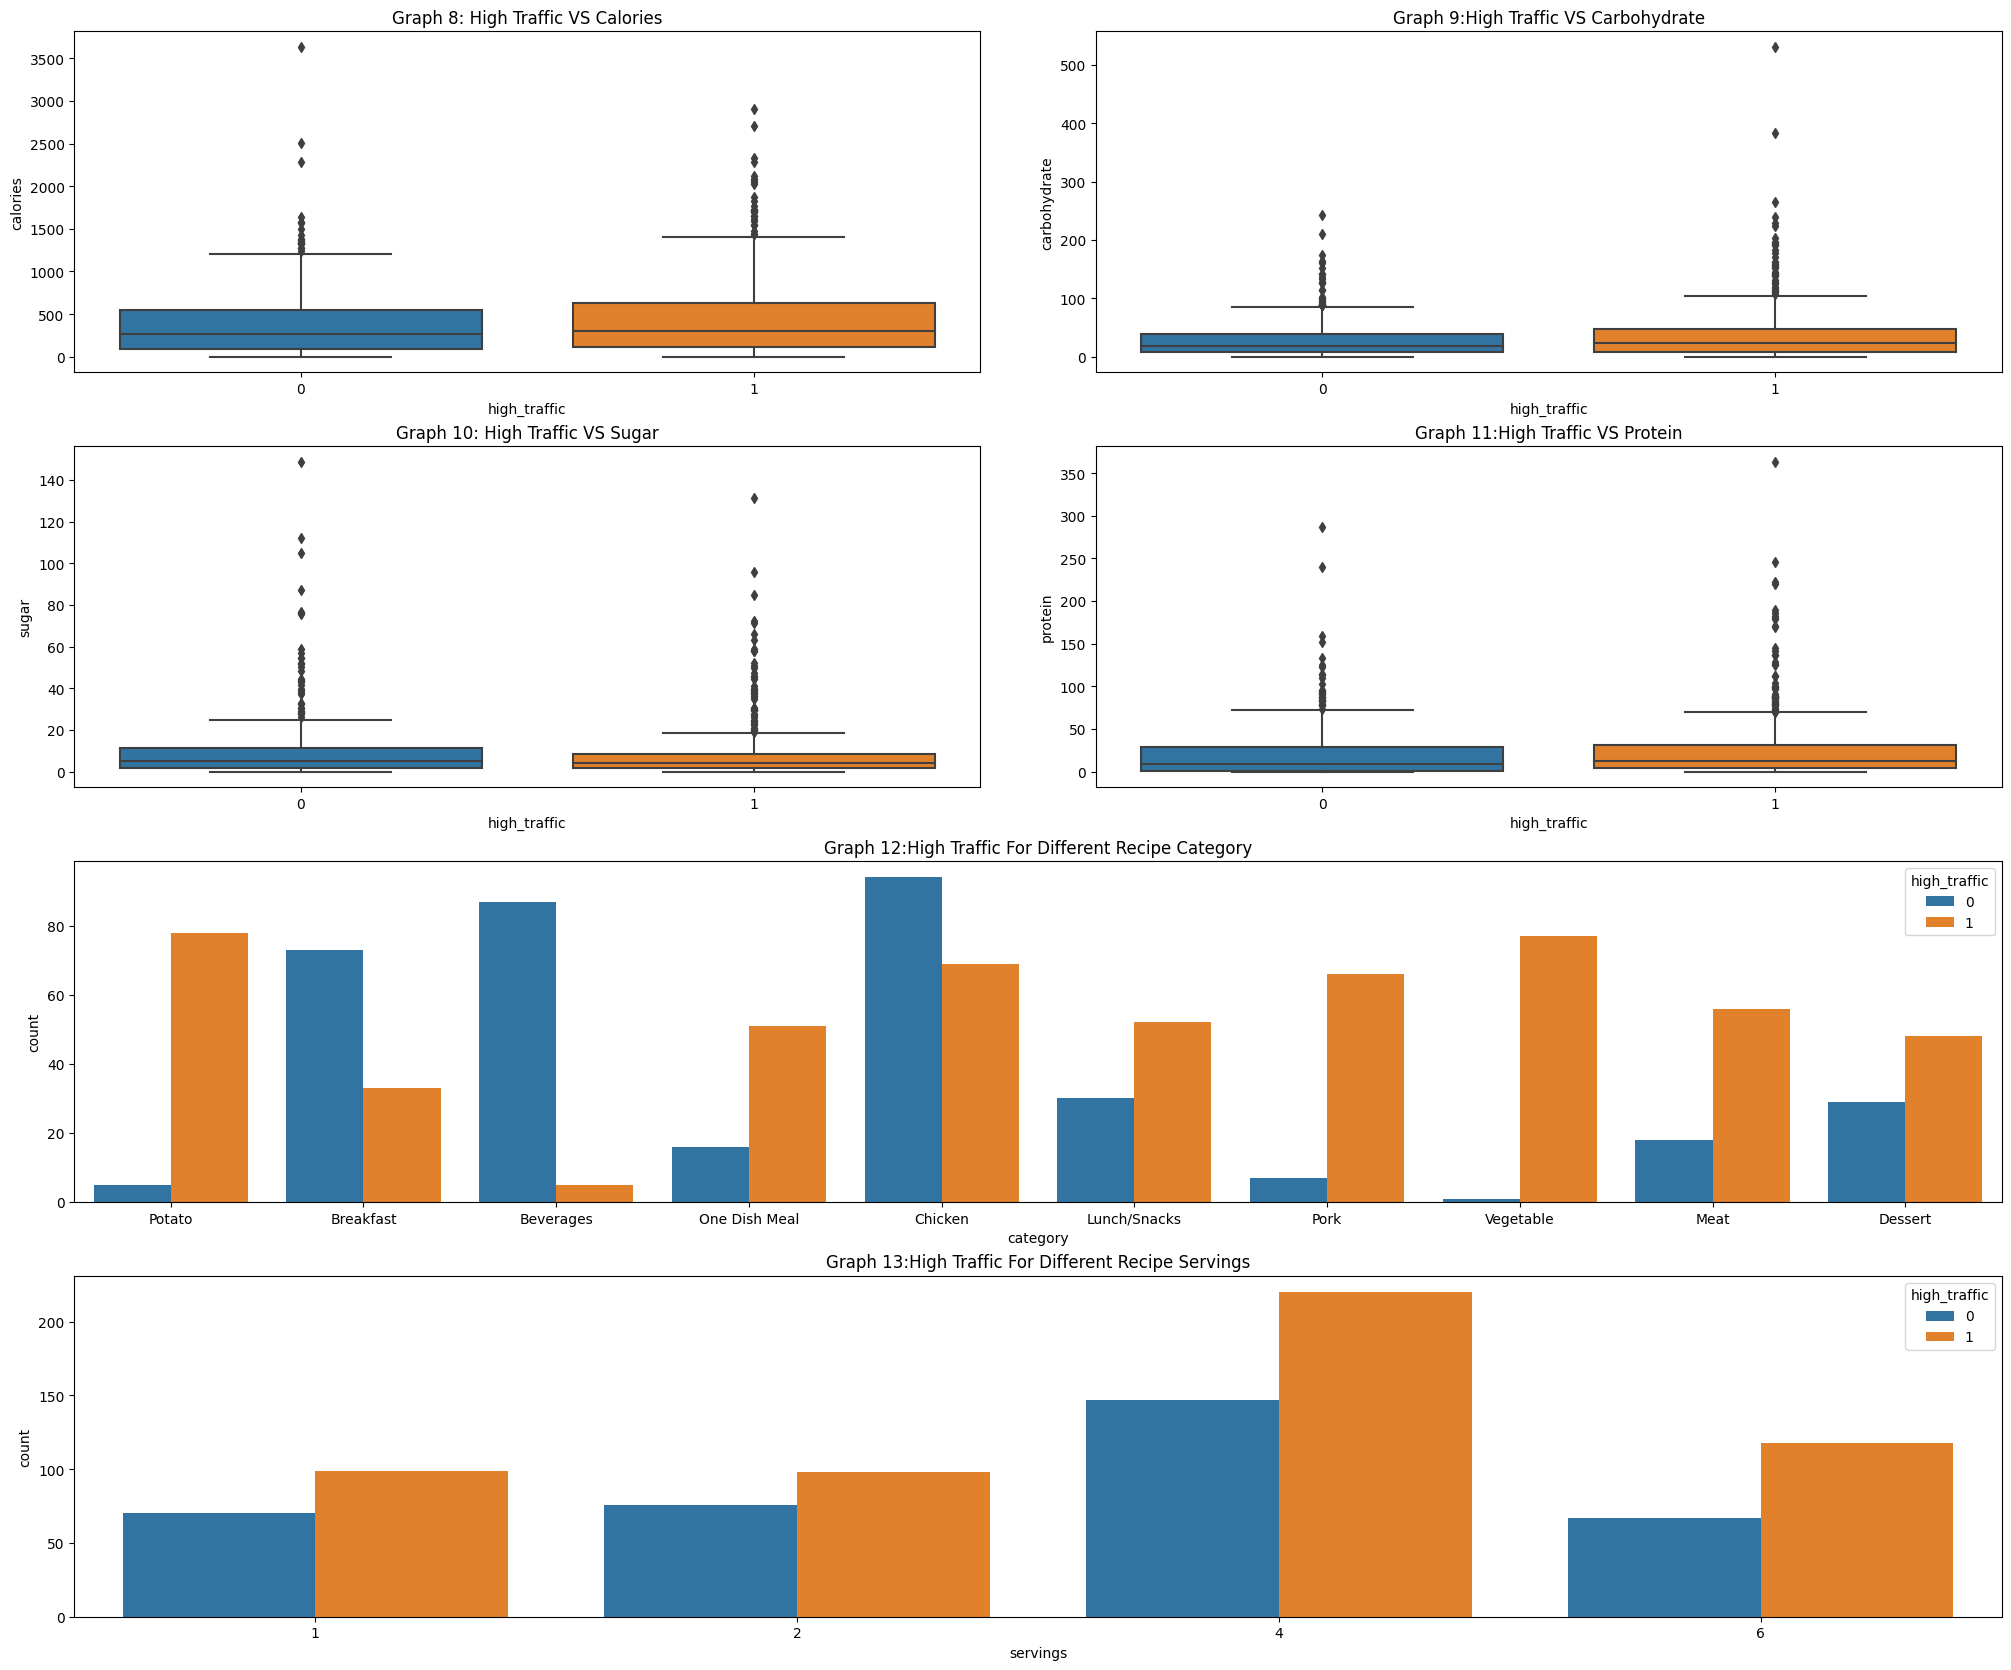

In [12]:
fig = plt.figure(figsize=(20, 20), constrained_layout=True)
spec = fig.add_gridspec(5, 2)
ax0 = fig.add_subplot(spec[0, 0])
sns.boxplot(x='high_traffic',y='calories',data=recipe_df,ax=ax0).set(title="Graph 8: High Traffic VS Calories")
ax1 = fig.add_subplot(spec[0,1])
sns.boxplot(x="high_traffic",y="carbohydrate",data=recipe_df,ax=ax1).set(title = "Graph 9:High Traffic VS Carbohydrate")
ax2 = fig.add_subplot(spec[1,0])
sns.boxplot(x="high_traffic",y="sugar",data=recipe_df,ax=ax2).set(title="Graph 10: High Traffic VS Sugar")
ax3 = fig.add_subplot(spec[1,1])
sns.boxplot(x="high_traffic",y="protein",data=recipe_df,ax=ax3).set(title="Graph 11:High Traffic VS Protein")
ax4 = fig.add_subplot(spec[2,:])
sns.countplot(data=recipe_df, x="category", hue="high_traffic",ax=ax4).set(title="Graph 12:High Traffic For Different Recipe Category")
ax5 = fig.add_subplot(spec[3,:])
sns.countplot(data=recipe_df, x="servings", hue="high_traffic",ax=ax5).set(title="Graph 13:High Traffic For Different Recipe Servings")


plt.show()

#### Insights:

- **Graph 8**:  The variable "calories" is not a good predictor of high traffic. I can see the median calorie value is similar in both the high-traffic and low-traffic recipes.
- **Graph 9**: The variable "carbohydrate" is not a good predictor of high traffic. I can see the median carbohydrate value is similar in both the high-traffic and low-traffic recipes.
- **Graph 10**: The variable "sugar" is not a good predictor of high traffic. I can see the median sugar value is similar in both the high-traffic and low-traffic recipes.
- **Graph 11**: The variable "protein" is not a good predictor of high traffic. I can see the median protein value is similar in both the high-traffic and low-traffic recipes.
- **Graph 12**: We can see that the recipe categories are not contributing equally to the traffic.Recipes in the categories "potato" and "vegetable" receive the most traffic, while recipes in the categories "beverages" and "breakfast" receive the least. It seems there is a relationship between recipe category and high-traffic.
- **Graph 13**: Serving sizes are not contributing equally to the traffic.Recipes with a serving size of 4 have high traffic.

## Hypothesis Testing


#### 1. Check the relationship between the variables recipe category & high-traffic
         Ha: There is a relationship between recipe category & high-traffic
         Hnull : There is no relationship between recipe category & high-traffic
#### 2. Check the relationship between the variables servings & high-traffic.
         Ha: There is a relationship between serving-size & high-traffic
         Hnull: There is no relationship between serving-size & high-traffic         

In [13]:
from scipy.stats import chi2_contingency

def ch_relation_cat_test(target,cat_var):
    observed_freq_cat= pd.crosstab(recipe_df[target],recipe_df[cat_var])
    chi2, pvalue, dof, ex = chi2_contingency(observed_freq_cat)
    if pvalue < 0.05:
        print(f"There is a relationship between the target variables {target} and {cat_var}.The pvalue is {pvalue}")
    else:
        print(f"There is no relationship between the target variables {target} and {cat_var}.The pvalue is {pvalue}")
        
ch_relation_cat_test('high_traffic','category')
ch_relation_cat_test('high_traffic','servings')

There is a relationship between the target variables high_traffic and category.The pvalue is 4.201574583161359e-60
There is no relationship between the target variables high_traffic and servings.The pvalue is 0.5311153478247259


## Building The Model

In [14]:
features = recipe_df.drop(columns=['high_traffic','recipe'])
X = pd.get_dummies(features,columns=['category'])
y= recipe_df['high_traffic']
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 895 entries, 1 to 946
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   calories                895 non-null    float64
 1   carbohydrate            895 non-null    float64
 2   sugar                   895 non-null    float64
 3   protein                 895 non-null    float64
 4   servings                895 non-null    int64  
 5   category_Beverages      895 non-null    uint8  
 6   category_Breakfast      895 non-null    uint8  
 7   category_Chicken        895 non-null    uint8  
 8   category_Dessert        895 non-null    uint8  
 9   category_Lunch/Snacks   895 non-null    uint8  
 10  category_Meat           895 non-null    uint8  
 11  category_One Dish Meal  895 non-null    uint8  
 12  category_Pork           895 non-null    uint8  
 13  category_Potato         895 non-null    uint8  
 14  category_Vegetable      895 non-null    ui

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
# Create a RobustScaler object
scaler = RobustScaler()
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42,test_size=0.20,stratify=y)

# Fit the scaler to the data
scaler.fit(X_train)

# Transform the training and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


#### I have made the following modifications to enable model fitting:
 
- All categorical variables were converted to numeric variables.
- The data was scaled using Robust Scaler.
- The test and train data are evenly split into positive and negative classifications.



## Model Development and Evaulation

#### Method 1: Logistic Regression With Grid Search CV

In [16]:
def display_roc_curve(y_pred_prob,roc_auc,estimator_name):
    fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr,roc_auc=roc_auc,estimator_name=estimator_name).plot()
    roc_display.figure_.set_size_inches(5,5)
    plt.plot([0, 1], [0, 1], color = 'g')
    

Best hyperparameters Cross Validation: {'C': 1, 'penalty': 'l2', 'solver': 'saga'}
Best Score Cross Validation: 0.7931760184654922
ROC AUC SCORE: 0.8332035306334372
Precision: 0.845360824742268
Accuracy: 0.776536312849162


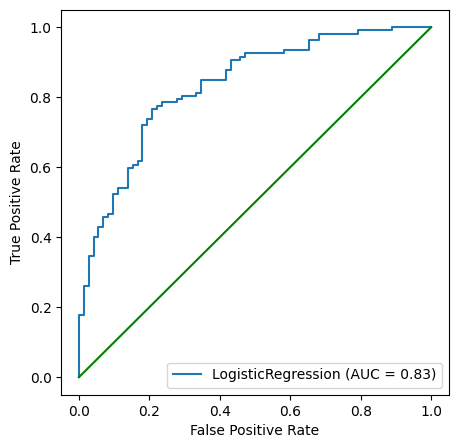

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score

# create a dictionary of hyperparameters to tune
param_grid = {
    "C": [0.1, 1, 10, 100],
    "penalty": ["l1", "l2"],
    "solver": ["liblinear", "saga"]
}

# create a logistic regression model with grid search cv
grid_logistic = GridSearchCV(LogisticRegression(random_state=42), param_grid, scoring=["precision","roc_auc"],refit="precision", cv=10)

# fit the logistic regression model to the training data
grid_logistic.fit(X_train_scaled, y_train)

# predict on the test data
y_pred = grid_logistic.predict(X_test_scaled)
y_pred_prob = grid_logistic.predict_proba(X_test_scaled)[:,1]



# print the best hyperparameters
print("Best hyperparameters Cross Validation:", grid_logistic.best_params_)
print("Best Score Cross Validation:", grid_logistic.best_score_)

# evaluate the model on the test data
roc_auc = roc_auc_score(y_test, y_pred_prob)
precision = precision_score(y_test, y_pred)
accuracy_logreg = accuracy_score(y_test, y_pred)
display_roc_curve(y_pred_prob,roc_auc,'LogisticRegression')
print("ROC AUC SCORE:",roc_auc)
print("Precision:", precision)
print("Accuracy:",accuracy_logreg)


The best cross-validation score for logistic regression is 0.79. The logistic regression model's precision score for the test data is 0.85, meaning that 85% of the time the model will correctly predict high-traffic recipes. The accuracy of the model is 0.78, and the roc-auc score for the model is 0.83.

#### Method 2: Random Forest Classifier With RFE and Grid Search CV

Features Selected From RFE are: Index(['calories', 'carbohydrate', 'sugar', 'protein', 'servings',
       'category_Beverages', 'category_Breakfast', 'category_Chicken',
       'category_Potato', 'category_Vegetable'],
      dtype='object')
Accuracy: 0.8148148148148148
Best hyperparameters Cross Validation: {'max_depth': 5, 'n_estimators': 25}
Best Score Cross Validation: 0.7591265245502085
ROC AUC SCORE: 0.8353452751817237
Precision: 0.8148148148148148
Accuracy: 0.7821229050279329


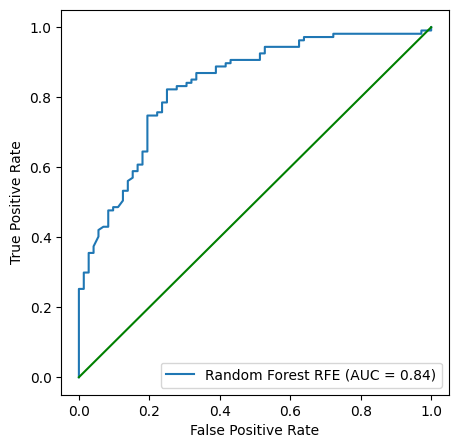

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
# Create a Random Forest Classifier model
rf = RandomForestClassifier(random_state=42)

# Use RFE to select the top 10 features
rfe = RFE(rf, n_features_to_select=10)
X_train_rfe = rfe.fit_transform(X_train_scaled, y_train)
print("Features Selected From RFE are:",X.columns[rfe.support_])

# Define a grid of hyperparameters to search
param_grid = {
    'n_estimators': [25,50,100, 500, 1000],
    'max_depth': [3,5, 10, 15]
}

# Use Grid Search CV to find the best hyperparameters
grid_search = GridSearchCV(rf, param_grid, cv=10,scoring=["precision","roc_auc"],refit="precision")
grid_search.fit(X_train_rfe, y_train)

# Use the best model to make predictions on the test data
y_pred_rf = grid_search.predict(rfe.transform(X_test_scaled))
y_pred_rf_prob = grid_search.predict_proba(rfe.transform(X_test_scaled))[:,1]


# Evaluate the model's performance
print(f'Accuracy: {grid_search.score(rfe.transform(X_test_scaled), y_test)}')

# print the best hyperparameters
print("Best hyperparameters Cross Validation:", grid_search.best_params_)
print("Best Score Cross Validation:", grid_search.best_score_)

# evaluate the model on the test data
roc_auc_rf = roc_auc_score(y_test, y_pred_rf_prob)
precision_rf = precision_score(y_test, y_pred_rf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
display_roc_curve(y_pred_rf_prob,roc_auc_rf,'Random Forest RFE')
print("ROC AUC SCORE:",roc_auc_rf)
print("Precision:", precision_rf)
print("Accuracy:",accuracy_rf)

The Random Forest Classification model with the top 10 features has the best cross-validation score of 0.76. The precision score of the random forest classification model is 0.81, which indicates that 81% of the time the model would accurately predict high-traffic recipes. The model's accuracy is 0.78, and the roc-auc score for the model is 0.84.

#### Method 3: Random Forest Classifier With All Features

Best hyperparameters Cross Validation: {'max_depth': 10, 'n_estimators': 25}
Best Score Cross Validation: 0.7631711500807612
ROC AUC SCORE: 0.8004932502596054
Precision: 0.8037383177570093
Accuracy: 0.7653631284916201


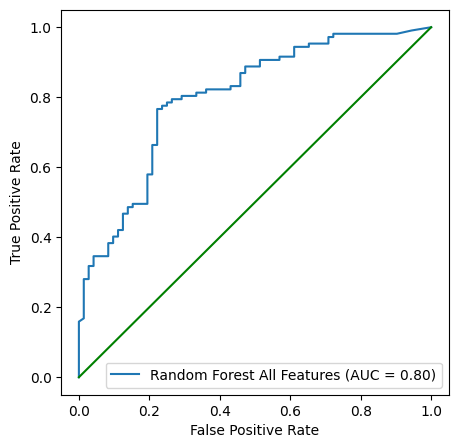

In [19]:
# Create a Random Forest Classifier model
rf = RandomForestClassifier(random_state=42)
# Define a grid of hyperparameters to search
param_grid = {
    'n_estimators': [25,50,100, 500, 1000],
    'max_depth': [3,5, 10, 15]
}
# Use Grid Search CV to find the best hyperparameters
grid_search_randF = GridSearchCV(rf, param_grid, cv=10,scoring=["precision","roc_auc"],refit="precision")
grid_search_randF.fit(X_train, y_train)

# Use the best model to make predictions on the test data
y_pred_randomF = grid_search_randF.predict(X_test)
y_pred_randF_prob = grid_search_randF.predict_proba(X_test)[:,1]


# print the best hyperparameters
print("Best hyperparameters Cross Validation:", grid_search_randF.best_params_)
print("Best Score Cross Validation:", grid_search_randF.best_score_)

# evaluate the model on the test data
roc_auc_randf = roc_auc_score(y_test, y_pred_randF_prob)
precision_randomF = precision_score(y_test, y_pred_randomF)
accuracy_randomF = accuracy_score(y_test, y_pred_randomF)
display_roc_curve(y_pred_randF_prob,roc_auc_randf,"Random Forest All Features")
print("ROC AUC SCORE:",roc_auc_randf)
print("Precision:", precision_randomF)
print("Accuracy:",accuracy_randomF)


The Random Forest Classification model has the best cross-validation score of 0.76. The accuracy score of the random forest classification model is 0.80, indicating that it would accurately identify high-traffic recipes 80% of the time. The model's accuracy is 0.76, while the model's roc-auc score is 0.80. In comparison to the Random Forest Classification model with all features, the Random Forest Classification model with the top ten features has higher accuracy, precision, and ROC-AUC score.

#### Method 4: XGBClassifier With GridSearch CV

Best Hyper parameters cross validation: {'max_depth': 3, 'n_estimators': 25}
Best score cross validation: 0.7640420489006575
ROC AUC SCORE: 0.8308670820353063
Precision For XGBoost Model: 0.8315789473684211
Accuracy For XGBoost Model: 0.7541899441340782


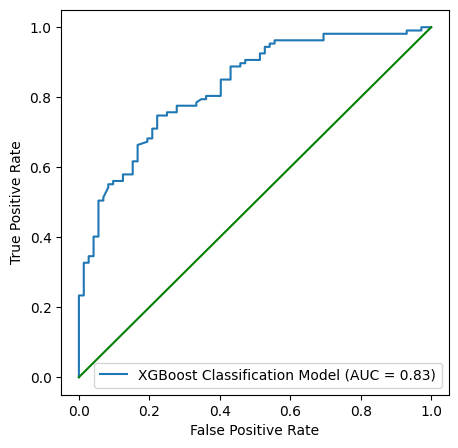

In [20]:
from xgboost import XGBClassifier
# Define the hyperparameter grid to search over
param_grid = {'max_depth': [3, 5, 7,None], 'n_estimators': [25,50,100]}
# Create the XGBoost classifier
xgb_clf = XGBClassifier(random_state=42)

# Create the grid search object
grid_search_xgb = GridSearchCV(xgb_clf, param_grid, cv=10,scoring=["precision","roc_auc"],refit="precision")

# Fit the grid search to the training data
grid_search_xgb.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Hyper parameters cross validation:", grid_search_xgb.best_params_)
print("Best score cross validation:", grid_search_xgb.best_score_)

# Evaluate the performance of the best model on the test set
y_pred_xgb = grid_search_xgb.predict(X_test)
y_pred_xgb_prob = grid_search_xgb.predict_proba(X_test)[:,1]


# evaluate the model on the test data
roc_auc_xgb = roc_auc_score(y_test, y_pred_xgb_prob)
precision_xgb = precision_score(y_test, y_pred_xgb)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
display_roc_curve(y_pred_xgb_prob,roc_auc_xgb,'XGBoost Classification Model')

print("ROC AUC SCORE:",roc_auc_xgb)
print("Precision For XGBoost Model:", precision_xgb)
print("Accuracy For XGBoost Model:",accuracy_xgb)




For XGBoost classification, 0.76 is the best cross-validation score. The precision score for the test data for the XGBoost Classification model is 0.83, which indicates that 83% of the time the model would correctly identify high-traffic recipes. The model's accuracy is 0.76, while its ROC-AUC score is 0.83.

#### Predicting which recipes will lead to high traffic is a classification problem. I have chosen the logistic model as the baseline model because it is very efficient to train and interpret. For the comparison models, I have chosen the XGBoost classification model and the Random Forest classification model, as they are tree-based models that can map non-linear relationships quite well. I have used Grid Search Cross Validation to tune the hyperparameters and improve the score of the model.

## Model Evaluation

The model is evaluated on the following metrics Precision,Accuracy and ROC-AUC score.
    
![Model_Metric](Model_Metric.jpg)
    

**The logistic regression model has the best precision of 0.85, followed by the XGBoost classification model. The accuracy of the Logistic Regression Model and the Random Forest Classication Model with 10 features chosen based on RFE is 0.78. The Random Forest Classification Model with RFE has the best ROC-AUC score of 0.84, followed by the Logistic Regression Model and the XGBoost Classification Model.**


## Business Metric

The business goal is to correctly predict high traffic recipes 80% of the time and minimize the chance of showing unpopular recipes. I have used precision as a metric for evaluating the business goal. All the models have achieved a precision of 80%. The logistic regression model has a maximum precision of 0.85, implying that 85% of the time the model would correctly identify high-traffic recipes

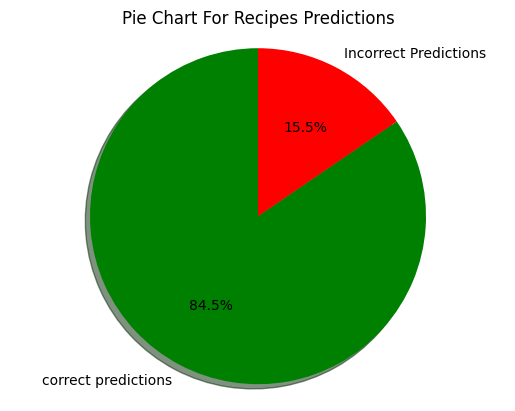

In [21]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
list_dict ={}
list_dict['correct predictions'] = tp*100/(tp+fp)
list_dict['Incorrect Predictions'] = 100 - list_dict['correct predictions']
colors = ['green', 'red']
plt.pie(list(list_dict.values()), labels=list_dict.keys(), colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title("Pie Chart For Recipes Predictions")
plt.show()

## Business Recommendations

1. The Logistic Regression model should be selected and deployed to predict the high-traffic recipes.
2. More data should be collected so that the result is more robust. 
3. The exploratory data analysis revealed that "potato" and "vegetable" recipes receive the greatest traffic. Because these categories are so popular, the business should collect more data about them.
4. In comparison to the Random Forest Classification model with all features, the Random Forest Classification model with the top ten features has higher accuracy, precision, and ROC-AUC score. The business should give importance to these features while predicting the high-traffic recipes.
